# InceptionNet_v3_Face_Emotion_Detection

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model

In [4]:
train_dir = '/content/drive/MyDrive/VehicleDetection/Train'
val_dir = '/content/drive/MyDrive/VehicleDetection/Test'

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(160,160),
        batch_size=64,
        color_mode="rgb",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(160,160),
        batch_size=64,
        color_mode="rgb",
        class_mode='categorical')

Found 3059 images belonging to 16 classes.
Found 765 images belonging to 16 classes.


In [6]:
# Define Input shape of images for InceptionV3 model
from tensorflow.keras.applications.inception_v3 import InceptionV3
IMG_SHAPE = (160, 160, 3)
base_model = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

87924736/87910968 [==============================] - 1s 0us/step


In [7]:
for layer in base_model.layers:
  layer.trainable = False

In [8]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (16, activation='sigmoid')(x)           

model = Model( base_model.input, x) 

In [9]:
# Show Model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [10]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [11]:
model_info = model.fit_generator(
        train_generator,
        steps_per_epoch=3059 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=765 // 64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
47/47 [==============================] - 1330s 28s/step - loss: 0.2803 - accuracy: 0.5336 - val_loss: 0.1154 - val_accuracy: 0.6861
Epoch 2/50
47/47 [==============================] - 193s 4s/step - loss: 0.1044 - accuracy: 0.7482 - val_loss: 0.1043 - val_accuracy: 0.7287
Epoch 3/50
47/47 [==============================] - 190s 4s/step - loss: 0.0667 - accuracy: 0.8457 - val_loss: 0.1333 - val_accuracy: 0.7003
Epoch 4/50
47/47 [==============================] - 189s 4s/step - loss: 0.0541 - accuracy: 0.8918 - val_loss: 0.1015 - val_accuracy: 0.7514
Epoch 5/50
47/47 [==============================] - 189s 4s/step - loss: 0.0396 - accuracy: 0.9272 - val_loss: 0.1150 - val_accuracy: 0.7727
Epoch 6/50
47/47 [==============================] - 189s 4s/step - loss: 0.0338 - accuracy: 0.9486 - val_loss: 0.0844 - val_accuracy: 0.8011
Epoch 7/50
47/47 [==============================] - 189s 4s/step - loss: 0.0213 - accuracy: 0.9696 - val_loss: 0.1163 - val_accuracy: 0.7770
Epoch 8/50


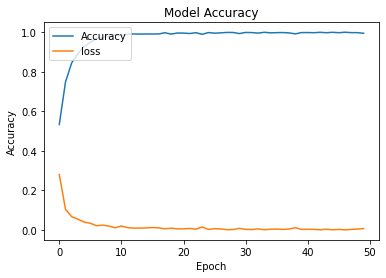

In [12]:
from matplotlib import pyplot as plt
plt.plot(model_info.history['accuracy'])
plt.plot(model_info.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.legend(['train', 'val'], loc='upper left')
plt.legend(["Accuracy","loss"],loc='upper left')
plt.show()

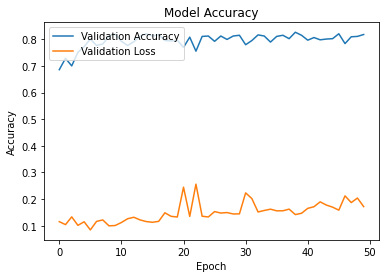

In [13]:
from matplotlib import pyplot as plt
plt.plot(model_info.history['val_accuracy'])
plt.plot(model_info.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.legend(['train', 'val'], loc='upper left')
plt.legend(["Validation Accuracy","Validation Loss"],loc='upper left')
plt.show()

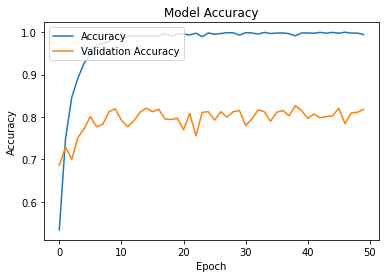

In [14]:
from matplotlib import pyplot as plt
plt.plot(model_info.history['accuracy'])
plt.plot(model_info.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.legend(['train', 'val'], loc='upper left')
plt.legend(["Accuracy","Validation Accuracy"],loc='upper left')
plt.show()

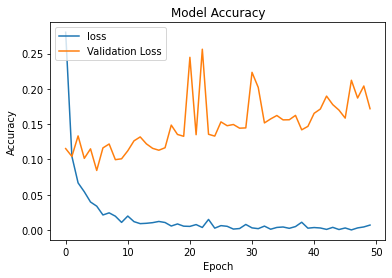

In [15]:
from matplotlib import pyplot as plt
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.legend(['train', 'val'], loc='upper left')
plt.legend(["loss","Validation Loss"],loc='upper left')
plt.show()

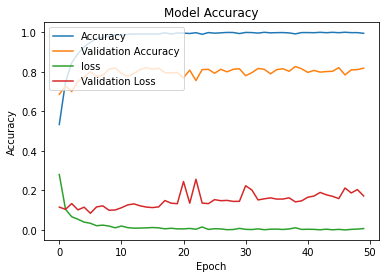

In [16]:
from matplotlib import pyplot as plt
plt.plot(model_info.history['accuracy'])
plt.plot(model_info.history['val_accuracy'])
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.legend(['train', 'val'], loc='upper left')
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"],loc='upper left')
plt.show()

In [17]:
#Saving the model
model.save('vehicle_model.h5')

In [24]:
from keras.models import load_model
vehicle_model = load_model('vehicle_model.h5')

In [20]:
!pip install gtts
!pip install pyttsx3

In [21]:
import pandas as pd
import pyttsx3
from gtts import gTTS #Import Google Text to Speech
from IPython.display import Audio
from gtts import gTTS
def vehicle_analysis(vehicle):
    objects = ('bicycle', 'bike', 'boat', 'bus', 'c-n-g', 'car', 'easy-bike', 'horse-cart', 'launch', 'leguna', 'lorry', 'rickshaw', 'thelagari', 'tractor', 'truck', 'van')
    a=objects[vehicle]
    print(a)
           #Import Audio method from IPython's Display Class
    tts = gTTS(a) #Provide the string to convert to speech
    tts.save('1.wav') #save the string converted to speech as a .wav file

max value in array:  0.99999404
max value index:  5
car


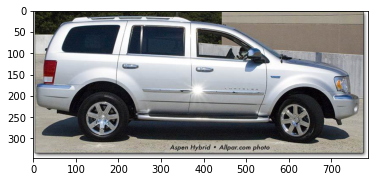

In [25]:
# must upload haarcascade_frontalface_alt.xml file in colab otherwise it cannot detect face emotion perfectly
import cv2
            

#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = 'photo.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="rgb", target_size=(160, 160))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = vehicle_model.predict(x)
maxVal_Index = np.argmax(custom)
print('max value in array: ', np.amax(custom))
print('max value index: ', maxVal_Index)


vehicle_analysis(maxVal_Index)

x = np.array(x, 'float32')
x = x.reshape([160, 480]);


plt.imshow(true_image)
plt.show()

In [26]:
sound_file = '1.wav'
Audio(sound_file, autoplay=True) 